<h3>Import Basic Libraries</h3>

In [ ]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Import libraries required for timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
# Import KERAS:TimeseriesGenerator
# This class produces time series batches used on training/testing the model

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import KERAS:MinMaxScaler
# This class is used to preprocess (scale) the data

from sklearn.preprocessing import MinMaxScaler

<h3>Data Set: Walmart Inc. (WMT); Time Period:Jan 1, 2020 - Feb 28, 2022</h3>

In [ ]:
# Selecting the dataset
dataset_path = "D:\Downloads\WMT-01012020-02282022.csv"

In [ ]:
# Creating a dataframe called df_ALL

df_ALL = pd.read_csv(dataset_path)

In [ ]:
# Load the first five rows

df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,118.860001,119.889999,118.699997,118.940002,112.910896,6764900
1,2020-01-03,118.269997,118.790001,117.589996,117.889999,111.914124,5399200
2,2020-01-06,117.400002,118.089996,116.769997,117.650002,111.686272,6445500
3,2020-01-07,117.260002,117.519997,116.199997,116.559998,110.651520,6846900
4,2020-01-08,116.300003,116.730003,115.680000,116.160004,110.271812,5875800


<h3>Exploratory Data Analysis (EDA)</h3>

In [ ]:
# Count Variables and data points

df_ALL.shape

(544, 7)

In [ ]:
# Identify the data types of variables

df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Summary Statistics

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,135.860331,137.127904,134.696930,135.890827,131.337742,8.674467e+06
std,10.852610,10.583810,10.990895,10.721390,11.271173,4.401072e+06
min,105.199997,108.519997,102.000000,104.050003,98.775673,3.018200e+06
25%,129.649994,130.992501,128.537499,129.737500,124.379202,6.061100e+06
50%,139.409996,140.375000,138.370002,139.404999,135.346908,7.307650e+06
75%,143.697495,145.002502,142.742504,143.825004,139.334347,9.863500e+06
max,153.600006,153.660004,151.660004,152.789993,147.902008,3.967290e+07


In [ ]:
# Select only the Closing Price for analysis

df = df_ALL.iloc[:,4:5]

In [ ]:
df.head()

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004


<AxesSubplot:>

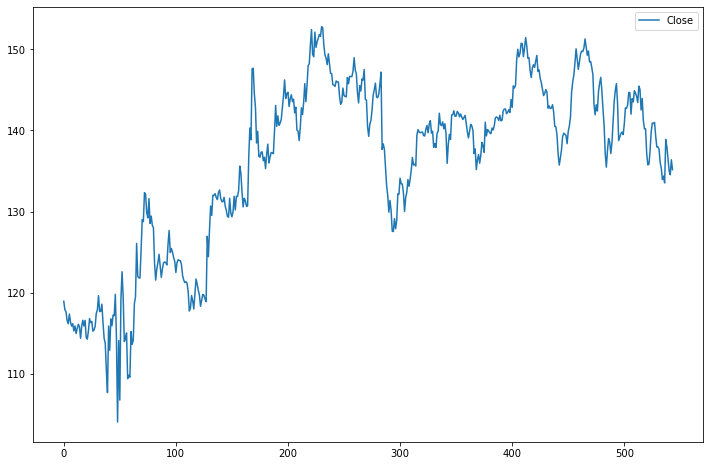

In [ ]:
# Plot Closing Price

df.plot(figsize=(12,8))

<h3>Length of Input Time Series - Number of Input Time Steps</h3>

In [ ]:
# Set the length of the input sequence
# Here we are using 40 consecutive closing prices to predict the next one

length50= 50

In [ ]:
length50

50

<h3>Time Series Dataset: Train/Test Split</h3>

In [ ]:
len(df)

544

In [ ]:
# Set percentage of data used for testing, 20% reserved for testing

test_percent = 0.2

In [ ]:
# Number of data points reserved for testing the model

len(df)*test_percent

108.80000000000001

In [ ]:
# Round the test data points to the nearest decimal

test_length = np.round(len(df)*test_percent)
test_length

109.0

In [ ]:
# Index of the testing data

split_index = int(len(df)-test_length)
split_index

435

In [ ]:
# Training Dataset, 80% reserved for training data

data_train = df.iloc[: split_index]

# Testing Dataset
# All the indicies from (split_index - length50) to the end of the dataframe
# split_index - length50: Need the last 50 historical data points (belong to data_train) to predict the first data point of the data_test

data_test = df.iloc[split_index - length50 :]


In [ ]:
#Load training data first 5 rows
data_train.head()

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004


In [ ]:
#Load training data last 5 rows
data_train.tail()

,Close
430,145.029999
431,144.729996
432,142.740005
433,143.020004
434,142.690002


In [ ]:
#Load testing data first 5 rows
data_test.head()

,Close
385,141.550003
386,141.660004
387,141.559998
388,141.229996
389,141.869995


In [ ]:
#Load testing data last 5 rows
data_test.tail()

,Close
539,136.449997
540,135.050003
541,134.529999
542,136.380005
543,135.160004


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [ ]:
# Create a MinMaxScaler to normalize the data

scaler = MinMaxScaler()

In [ ]:
# Train the scaler to perform the normalization (for training data only)

scaler.fit(data_train)

MinMaxScaler()

In [ ]:
# Normalize the training dataset

normalized_train = scaler.transform(data_train)

# Normalize the testing dataset

normalized_test = scaler.transform(data_test)

<h3>Create TimeseriesGenerator for Training</h3>

In [ ]:
# TimeseriesGenerator: Generate Time Series batches for training/testing
# Length is 45
# Batch size: Number of time series samples in each batch

batch_size22 = 22

# Creating a TimeseriesGenerator for Training

train_tsGenerator45 = TimeseriesGenerator(normalized_train, normalized_train, length=length50, batch_size=batch_size22)

In [ ]:
# Length of the normalized training dataset

len(normalized_train)

435

In [ ]:
len(train_tsGenerator45)

18

In [ ]:
# Check the first batch

X,y = train_tsGenerator45[0]

In [ ]:
print(X)

[[[0.30549861]
  [0.28395566]
  [0.27903163]
  ...
  [0.21296674]
  [0.        ]
  [0.20619608]]

 [[0.28395566]
  [0.27903163]
  [0.25666798]
  ...
  [0.        ]
  [0.20619608]
  [0.05560114]]

 [[0.27903163]
  [0.25666798]
  [0.24846129]
  ...
  [0.20619608]
  [0.05560114]
  [0.31206406]]

 ...

 [[0.25707841]
  [0.21419773]
  [0.20968396]
  ...
  [0.36807548]
  [0.36499788]
  [0.36417734]]

 [[0.21419773]
  [0.20968396]
  [0.23020099]
  ...
  [0.36499788]
  [0.36417734]
  [0.43598696]]

 [[0.20968396]
  [0.23020099]
  [0.26179724]
  ...
  [0.36417734]
  [0.43598696]
  [0.51189992]]]


In [ ]:
print (y)

[[0.05560114]
 [0.31206406]
 [0.38018061]
 [0.31596219]
 [0.20352893]
 [0.20988917]
 [0.22527694]
 [0.10976611]
 [0.11838322]
 [0.11345917]
 [0.22855973]
 [0.19634801]
 [0.20701678]
 [0.29954867]
 [0.31657782]
 [0.45178501]
 [0.36807548]
 [0.36499788]
 [0.36417734]
 [0.43598696]
 [0.51189992]
 [0.50697573]]


<h3>Build, Train, and Test Model</h3></n></n><h3>Build LSTM Model</h3>

In [ ]:
# We are using only one feature, i.e., Close Price

n_features = 1

In [ ]:
# Define model

model = Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells
# Activation function: relu

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length50, n_features)))

# Dropout Layer

model.add(Dropout(0.2))

# Add 2nd LSTM layer

model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout Layer

model.add(Dropout(0.2))

# Add 3rd LSTM layer

model.add(LSTM(units=50, activation='relu'))

# Add a fully-connected layer for the final prediction

model.add(Dense(1))

<h3>Compile Model</h3>

In [ ]:
# Compile Model

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

<h3>Train (fit) model using fit_generator()</h3>

In [ ]:
# Train the model

model.fit_generator(train_tsGenerator45, epochs=30)

Epoch 1/30


C:\Users\Phani\AppData\Local\Temp\ipykernel_20424\2165057723.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator45, epochs=30)


18/18 [==============================] - 7s 83ms/step - loss: 0.2418
Epoch 2/30
18/18 [==============================] - 2s 82ms/step - loss: 0.0426
Epoch 3/30
18/18 [==============================] - 2s 83ms/step - loss: 0.0178
Epoch 4/30
18/18 [==============================] - 2s 83ms/step - loss: 0.0139
Epoch 5/30
18/18 [==============================] - 1s 81ms/step - loss: 0.0109
Epoch 6/30
18/18 [==============================] - 2s 82ms/step - loss: 0.0106
Epoch 7/30
18/18 [==============================] - 2s 90ms/step - loss: 0.0109
Epoch 8/30
18/18 [==============================] - 2s 89ms/step - loss: 0.0107
Epoch 9/30
18/18 [==============================] - 2s 90ms/step - loss: 0.0111
Epoch 10/30
18/18 [==============================] - 2s 84ms/step - loss: 0.0119
Epoch 11/30
18/18 [==============================] - 2s 84ms/step - loss: 0.0109
Epoch 12/30
18/18 [==============================] - 2s 82ms/step - loss: 0.0101
Epoch 13/30
18/18 [=============================

<h3>Visualize Model's Performance after Training</h3>

In [ ]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

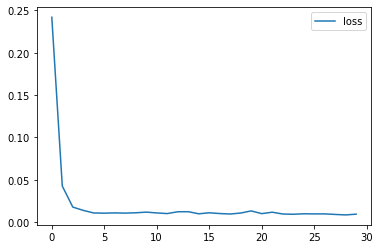

In [ ]:
# Load the loss data (model.history.history) into a data frame

ds_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()

ds_model_loss.plot()

<h3>Prediction for Testing: Using TimeseriesGenerator</h3></n></n><h5>Create TimeseriesGenerator for Testing</h5>

In [ ]:
# Batch Size is 1

batch_size1 = 1

# Create a TimeseriesGenerator for testing: test_tsGenerator

test_tsGenerator45 = TimeseriesGenerator(normalized_test, normalized_test, length=length50, batch_size=batch_size1)

<h5>Predict Future Data Points for Testing</h5>

In [ ]:
normalized_prediction = model.predict_generator(test_tsGenerator45)

C:\Users\Phani\AppData\Local\Temp\ipykernel_20424\26107903.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction = model.predict_generator(test_tsGenerator45)


In [ ]:
# Prediction is a numpy 2D array with only one column

normalized_prediction

array([[0.79366285],
       [0.7883788 ],
       [0.78327656],
       [0.7782745 ],
       [0.773011  ],
       [0.7674836 ],
       [0.7615492 ],
       [0.7547835 ],
       [0.7469697 ],
       [0.73852456],
       [0.730018  ],
       [0.7221593 ],
       [0.71535456],
       [0.709701  ],
       [0.70512736],
       [0.7012679 ],
       [0.6983217 ],
       [0.69639224],
       [0.6956662 ],
       [0.6967452 ],
       [0.6998185 ],
       [0.7047881 ],
       [0.71162504],
       [0.7203209 ],
       [0.73019785],
       [0.74041283],
       [0.7506526 ],
       [0.7608251 ],
       [0.7708158 ],
       [0.7804313 ],
       [0.7896226 ],
       [0.7985529 ],
       [0.8069107 ],
       [0.81430644],
       [0.82075477],
       [0.8259108 ],
       [0.8298177 ],
       [0.8324072 ],
       [0.833626  ],
       [0.83273345],
       [0.82956123],
       [0.8247438 ],
       [0.81861454],
       [0.8122148 ],
       [0.80628973],
       [0.80138934],
       [0.7972162 ],
       [0.793

In [ ]:
len(normalized_prediction)

109

In [ ]:
# Convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [ ]:
# Flatten all the 2D array

prediction_index = np.arange(435, 544, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['Prediction'])

In [ ]:
df_prediction

,Prediction
435,142.733124
436,142.475571
437,142.226898
438,141.983093
439,141.726547
...,...
539,136.527267
540,136.365021
541,136.217377
542,136.070068


<h3>Visualize Prediction</h3>

<AxesSubplot:>

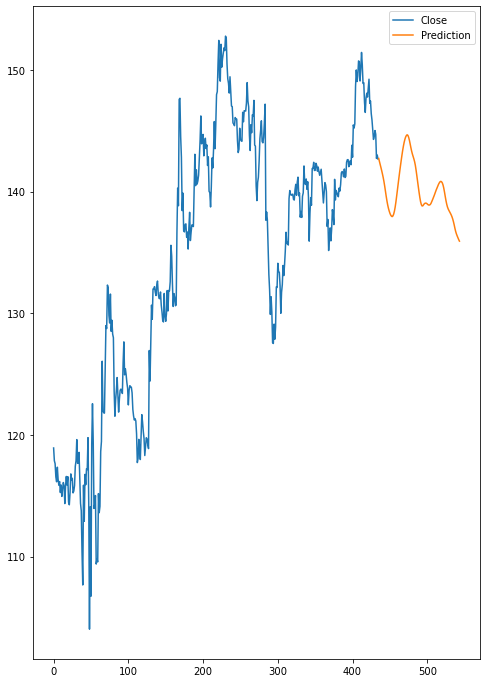

In [ ]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Visualize Prediction and Compare Actual Close Price</h3>

<AxesSubplot:>

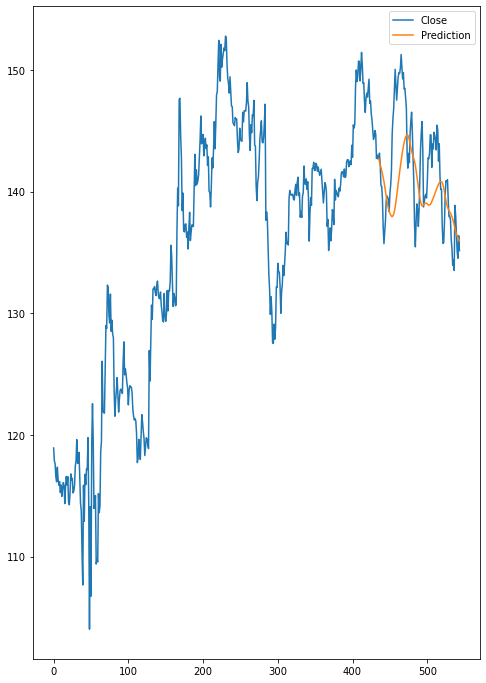

In [ ]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Time Series Forecasting with LSTM</h3></n></n><h5>Preprocess Full Input Dataset</h5>

In [ ]:
# Using MinMaxScaler to normalize the full dataset df

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

<h3>Create TimeSeriesGenerator for Forecasting</h3>

In [ ]:
# Number of steps of the input timeseries

length50

50

In [ ]:
# Create Timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length50, batch_size=batch_size22)

<h3>Build, Compile, and fit LSTM Model for Forecasting</h3>

In [ ]:
# Train/Fit LSTM Model

model.fit_generator(forecast_tsGenerator, epochs = 30)

Epoch 1/30


C:\Users\Phani\AppData\Local\Temp\ipykernel_20424\3313768870.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(forecast_tsGenerator, epochs = 30)


23/23 [==============================] - 1s 51ms/step - loss: 0.0099
Epoch 2/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0089
Epoch 3/30
23/23 [==============================] - 1s 42ms/step - loss: 0.0092
Epoch 4/30
23/23 [==============================] - 1s 43ms/step - loss: 0.0152
Epoch 5/30
23/23 [==============================] - 1s 47ms/step - loss: 0.0098
Epoch 6/30
23/23 [==============================] - 1s 46ms/step - loss: 0.0075
Epoch 7/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0085
Epoch 8/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0080
Epoch 9/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0077
Epoch 10/30
23/23 [==============================] - 2s 82ms/step - loss: 0.0076
Epoch 11/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0071
Epoch 12/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0069
Epoch 13/30
23/23 [=============================

<h3>Time Series Forecasting Using LSTM Neural Network </h3>

In [ ]:
forecast = []

# Set periods with the time span of forecasting
# Let's forecast for the next 30 business days (03/01/2022-04/11/2022)

periods = 30

first_eval_batch = normalized_full_data[-length50:]
current_batch = first_eval_batch.reshape((1, length50, n_features))

for i in range(periods):

    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])

    current_pred = model.predict(current_batch)[0]

    #store prediction

    forecast.append(current_pred)

    # update batch now include prediction and drop first value

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 62ms/step


<h3>Inverse to Transform Normalized Data Back into True Values</h3>

In [ ]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[134.23370597],
       [134.14036415],
       [133.96607379],
       [133.73653077],
       [133.47730604],
       [133.20814867],
       [132.94216661],
       [132.6866343 ],
       [132.44550852],
       [132.22054108],
       [132.01103474],
       [131.81600467],
       [131.63473328],
       [131.46636649],
       [131.30907404],
       [131.16233594],
       [131.02453692],
       [130.89520635],
       [130.77400724],
       [130.65975139],
       [130.55118959],
       [130.44792966],
       [130.34959392],
       [130.25462523],
       [130.16316593],
       [130.07422538],
       [129.98719932],
       [129.90246249],
       [129.81952975],
       [129.7378927 ]])

In [ ]:
df

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004
...,...
539,136.449997
540,135.050003
541,134.529999
542,136.380005


<h3>Creating new timestamp index with pandas</h3>

In [ ]:
# Calculate forecast index

forecast_index = np.arange(544, 574, step=1)

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
544,134.233706
545,134.140364
546,133.966074
547,133.736531
548,133.477306
549,133.208149
550,132.942167
551,132.686634
552,132.445509
553,132.220541


<h3>Plot the Forecast</h3>

<AxesSubplot:>

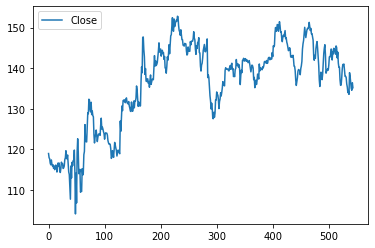

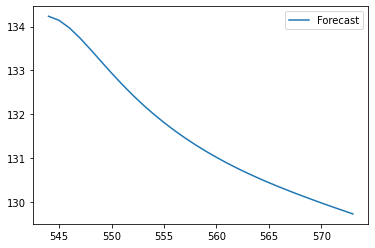

In [ ]:
df.plot()
forecast_df.plot()

<h3>Joining Pandas Plots</h3>

<AxesSubplot:>

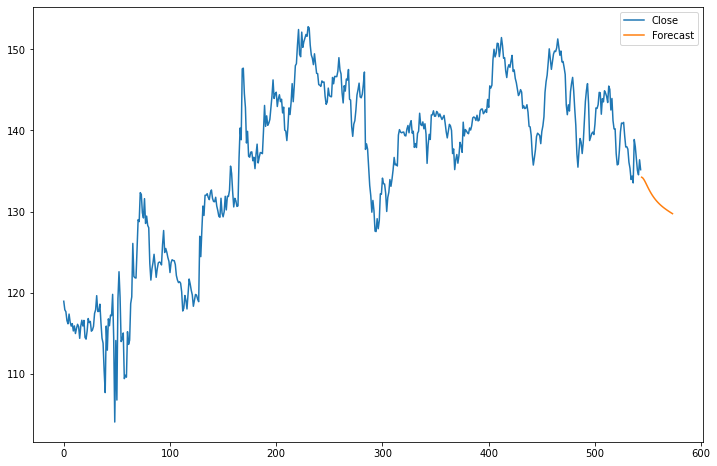

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))

In [ ]:
# Selecting the dataset (actual close price)
dir_path_dataset_2 = 'D:\Downloads\WMT-03012020-04112022.csv'

In [ ]:
# Creating a dataframe called df_ALL_MAR_APR_2022
df_ALL_MAR_APR_2022 = pd.read_csv(dir_path_dataset_2)

In [ ]:
# Print the first 5 rows of the dataframe
df_ALL_MAR_APR_2022.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2022,135.869995,137.889999,135.020004,135.990005,133.338913,8008300
1,3/2/2022,135.660004,136.830002,135.179993,136.160004,133.505585,7954600
2,3/3/2022,137.289993,140.470001,136.550003,139.289993,136.574570,9961700
3,3/4/2022,137.809998,142.940002,137.589996,142.820007,140.035751,11858800
4,3/7/2022,141.300003,143.630005,140.449997,141.669998,138.908173,15290000


In [ ]:
df_ALL_MAR_APR_2022 = df_ALL_MAR_APR_2022.iloc[:,4:5]
df_ALL_MAR_APR_2022

,Close
0,135.990005
1,136.160004
2,139.289993
3,142.820007
4,141.669998
5,138.740005
6,139.460007
7,142.630005
8,142.070007
9,144.050003


<AxesSubplot:>

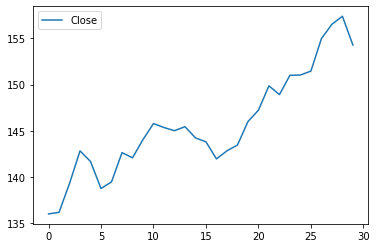

In [ ]:
# Plot stock close values
df_ALL_MAR_APR_2022.plot()

In [ ]:
forecast_df['Forecast'].values

array([134.23370597, 134.14036415, 133.96607379, 133.73653077,
       133.47730604, 133.20814867, 132.94216661, 132.6866343 ,
       132.44550852, 132.22054108, 132.01103474, 131.81600467,
       131.63473328, 131.46636649, 131.30907404, 131.16233594,
       131.02453692, 130.89520635, 130.77400724, 130.65975139,
       130.55118959, 130.44792966, 130.34959392, 130.25462523,
       130.16316593, 130.07422538, 129.98719932, 129.90246249,
       129.81952975, 129.7378927 ])

In [ ]:
df_ALL_MAR_APR_2022['Forecast'] = forecast_df['Forecast'].values
df_ALL_MAR_APR_2022

,Close,Forecast
0,135.990005,134.233706
1,136.160004,134.140364
2,139.289993,133.966074
3,142.820007,133.736531
4,141.669998,133.477306
5,138.740005,133.208149
6,139.460007,132.942167
7,142.630005,132.686634
8,142.070007,132.445509
9,144.050003,132.220541


<AxesSubplot:>

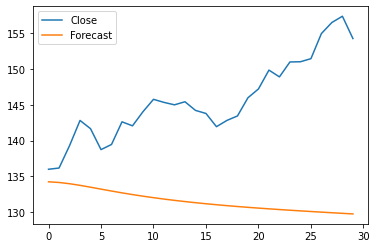

In [ ]:
# Plot Actual Close and Forecast
df_ALL_MAR_APR_2022.plot()

In [ ]:
Vipin Katakam